In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
ride_data = pd.read_csv("Instructions/Pyber/data/ride_data.csv")
city_data = pd.read_csv("Instructions/Pyber/data/City_data.csv")

In [40]:
df_combined = ride_data.merge(city_data, left_on="city", right_on="city")
df_combined.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


* Y axis = fare
* X axis = number of rides
* Bubble size = number of drivers
* Bubble color = City type

In [41]:
grouped = df_combined.groupby(["city", "type", "driver_count"])

In [42]:
df_grouped = pd.DataFrame({"ride":grouped["ride_id"].count(),"fare":grouped["fare"].mean()})

In [43]:
df_final = df_grouped.reset_index(level=['driver_count'])

In [44]:
# Create three new dataframes and split out by city type
urban_df = df_final.xs('Urban',level='type')
sub_df = df_final.xs('Suburban',level='type')
rural_df = df_final.xs('Rural',level='type')

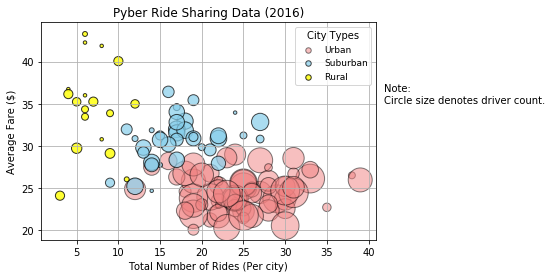

In [47]:
# Create scatter plots for the three city types
plt.scatter(urban_df["ride"],urban_df["fare"],s=urban_df["driver_count"]*12,c="lightcoral",marker="o",edgecolors="black",alpha=0.5,label="Urban")
plt.scatter(sub_df["ride"],sub_df["fare"],s=sub_df["driver_count"]*12,c="skyblue",marker="o",edgecolors="black",alpha=0.7,label="Suburban")
plt.scatter(rural_df["ride"],rural_df["fare"],s=rural_df["driver_count"]*12,c="yellow",marker="o",edgecolors="black",alpha=0.8,label="Rural")

plt.grid()
plt.xlabel("Total Number of Rides (Per city)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# # Create a legend
legend = plt.legend(title="City Types",loc="best",fontsize=9)
for l in legend.legendHandles:
    l.set_sizes([30.0])
    
note_txt = "Note:\nCircle size denotes driver count."
plt.gcf().text(0.92,0.6,note_txt,fontsize=10)

# Save the chart and output to file
plt.savefig("Pyber_Ride_share_2016.png")

Total Fare by City Type

Text(0.5, 1.0, '% of Fares by City Type')

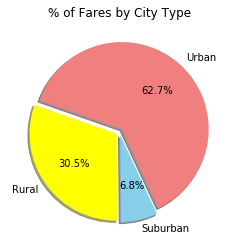

In [63]:
df_grouped["Total Fare"] = grouped["fare"].sum()

# Split the dataframe grouped by Total Fare by city type
df_urban = df_grouped.xs("Urban",level="type")
df_suburban = df_grouped.xs("Suburban", level="type")
df_rural = df_grouped.xs("Rural", level="type")

# Round the total fares of each city type and convert to percentage 
urban_fare = round((df_urban["Total Fare"].sum()/df_grouped["Total Fare"].sum())*100,1)
suburban_fare = round((df_suburban["Total Fare"].sum()/df_grouped["Total Fare"].sum())*100,1)
rural_fare = round((df_rural["Total Fare"].sum()/df_grouped["Total Fare"].sum())*100,1)

fares = [urban_fare, suburban_fare, rural_fare]
labels= ["Urban", "Rural", "Suburban"]

# Build Pie Chart
plt.pie(fares,explode=[0.04, 0.04, 0.04],labels=labels,colors=["lightcoral","yellow","skyblue"],autopct='%.1f%%', startangle=-65.0,shadow=True)
plt.title("% of Fares by City Type")

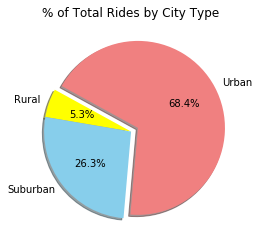

In [69]:
# Split the grouped dataframe by city types
df_urban_rides = df_grouped.xs("Urban",level="type")
df_suburban_rides = df_grouped.xs("Suburban",level="type")
df_rural_rides = df_grouped.xs("Rural",level="type")

# Create variables to hold the sum of rides for each city type and for the total rides
urban_rides = df_urban_rides["ride"].sum()
suburban_rides = df_suburban_rides["ride"].sum()
rural_rides = df_rural_rides["ride"].sum()
total_rides = urban_rides+suburban_rides+rural_rides

# Create variables to hold the rounded percentages of all the rides
urban_rides_rounded = round((urban_rides/total_rides)*100,1)
suburban_rides_rounded = round((suburban_rides/total_rides)*100,1)
rural_rides_rounded = round((rural_rides/total_rides)*100,1)

# Create list objects for rounded rides and for pie chart labels
rides=[urban_rides_rounded, rural_rides_rounded, suburban_rides_rounded]
labels=["Urban","Rural","Suburban"]

# Construct pie chart
plt.pie(rides,explode=[0.09,0,0],labels=labels,colors=["lightcoral","yellow","skyblue"],autopct='%.1f%%',startangle=-95.0,shadow=True)
plt.title("% of Total Rides by City Type")

# Save chart and output to file
plt.savefig("Percent_of_rides_by_type.png")

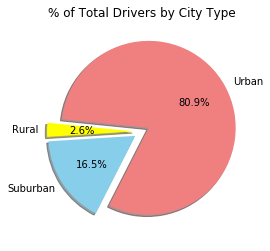

In [80]:
# Split the grouped dataframe by city types
df_urban_drivers = df_final.xs("Urban",level="type")
df_suburban_drivers = df_final.xs("Suburban",level="type")
df_rural_drivers = df_final.xs("Rural",level="type")

# Create variables to hold the sum of drivers for each city type and the total drivers
urban_drivers = df_urban_drivers["driver_count"].sum()
suburban_drivers = df_suburban_drivers["driver_count"].sum()
rural_drivers = df_rural_drivers["driver_count"].sum()

total_drivers = urban_drivers+rural_drivers+suburban_drivers

# Create variables to hold rounded percentages of drivers by city type
urban_drivers_percent = round((urban_drivers/total_drivers)*100,1)
rural_drivers_percent = round((rural_drivers/total_drivers)*100,1)
suburban_drivers_percent = round((suburban_drivers/total_drivers)*100,1)

# Create list objects for rounded driver percentages and for pie chart labels
drivers=[urban_drivers_percent,rural_drivers_percent,suburban_drivers_percent]
labels=["Urban","Rural","Suburban"]

# Construct pie chart
plt.pie(drivers, explode=[0.09, 0.09, 0.09],labels=labels,colors=["lightcoral","yellow","skyblue"],autopct='%.1f%%',startangle=-117.0,shadow=True)
plt.title("% of Total Drivers by City Type")

# Save chart and output to file
plt.savefig("Percent_of_drivers_by_type.png")

Data Observations

1. Urban cities have the most amount of drivers
2. Rural cities have fewer rides, but higher fares
3. Suburban drivers have more consistent levels of fares -- they are neither as high as rural nor as low as urban.